#data loading
For each stop as one node
    #original time scheule,format -> hh:mm
    #minutes level time, format ->   mm, calculate from hh*60+mm, convient to get the weight for each node
    # for each line with one time, so the timeschedule is organized as dictionary(With all line at this stop, we can get a list of dicts)
    Like Tamimi
    [{'Blue':[6:00,6:20,6:40]},{'Organe':[xx,xx]}]

In [16]:
# step 1, uniform the data as hh:mm, then to mm
import pandas as pd

# read Excel' sheet names
def get_sheet_names(file_path):
    try:
        xls = pd.ExcelFile(file_path)
        sheet_names = xls.sheet_names
        return sheet_names
    except FileNotFoundError:
        print("Cannot find the file!")
        return []
    except Exception as e:
        print(f"get_sheet_names() with error:{e}")
        return []

#read sheet'data
def read_sheet(file_path, sheet_name):
    try:
        data = pd.read_excel(file_path, sheet_name=sheet_name)
        return data
    except FileNotFoundError:
        print("Cannot find the file!")
        return None
    except Exception as e:
        print(f"read_sheet() with error:{e}")
        return None

#read xlsl file
file_path = '.\\KAUST_Bus_Schedule.xlsx'
sheet_names = get_sheet_names(file_path)
print("sheet names：", sheet_names)

#creat a dictionary for the pdf
map_dict = {}
#sheet names： ['Blue', 'Orange', 'Green', 'Gray', 'Red', 'Purple', 'Oasis', 'Palm']
for sheet_name in sheet_names:
    data = read_sheet(file_path, sheet_name)
    if data is not None:
        print(f"reading {sheet_name} data..")
        map_dict[sheet_name]=data



sheet names： ['Blue', 'Orange', 'Green', 'Gray', 'Red', 'Purple', 'Oasis', 'Palm']
reading Blue data..
reading Orange data..
reading Green data..
reading Gray data..
reading Red data..
reading Purple data..
reading Oasis data..
reading Palm data..


Notice:
At this stage, I got the dictionary for the graph. However I need to delete  the palm from my data
#each elemet in the xlsl is a class 'data.iloc[1,1]' class type:datetime.time

Follow, I  will get all the node'name and build up the dictionary for each node
# first row
first_row = data.iloc[0]

# first column
first_column = data.iloc[:, 0]

In [17]:
#get all nodes
Node=[]
Line_names=['Blue', 'Orange', 'Green', 'Gray', 'Red', 'Purple', 'Oasis', 'Palm']
def are_equal_after_stripping(str1, str2):
    # delete space and compare
    return str1.replace(" ", "") == str2.replace(" ", "")
for LN in Line_names:
    KeyList=map_dict[LN].columns.tolist()
    #print(KeyList)
    newKeys=[]
    for ikey in KeyList:
        ikey=ikey.replace(" ", "")
        newKeys.append(ikey)
        if ikey in Node:
            continue
        else:
            Node.append(ikey)
    map_dict[LN].columns=newKeys
    print(f"map_dict[LN]={map_dict[LN]}")

print(f'Node numbers：{len(Node)}\nNode={Node}')


map_dict[LN]=   TAMIMIMARKET KINDERGARDEN(CAMPUSEAST)  KAUSTINN       HSC    H4207A  \
0      06:20:00                 06:21:00  06:22:00  06:23:00  06:24:00   
1      06:40:00                 06:41:00  06:42:00  06:43:00  06:44:00   
2      07:00:00                 07:01:00  07:02:00  07:03:00  07:04:00   
3      07:20:00                 07:21:00  07:22:00  07:23:00  07:24:00   
4      07:40:00                 07:41:00  07:42:00  07:43:00  07:44:00   
5      08:00:00                 08:01:00  08:02:00  08:03:00  08:04:00   
6      08:20:00                 08:21:00  08:22:00  08:23:00  08:24:00   
7      08:40:00                 08:41:00  08:42:00  08:43:00  08:44:00   
8      09:00:00                 09:01:00  09:02:00  09:03:00  09:04:00   
9      09:20:00                 09:21:00  09:22:00  09:23:00  09:24:00   
10     09:40:00                 09:41:00  09:42:00  09:43:00  09:44:00   
11     10:00:00                 10:01:00  10:02:00  10:03:00  10:04:00   
12     10:20:00          

In [18]:
#build the graph for each line

Data Preprocess finish
# Next step: build the graph,,require  pycairo or cairocffi
1. using the library igraph

weight= [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 3, 2, 2, 4, 1, 1, 1, 4, 1, 1, 1, 2, 4, 3, 3, 2, 2]
Name2ID_dict={'TAMIMIMARKET': [0, 22, 43, 65, 85, 100, 121], 'KINDERGARDEN(CAMPUSEAST)': [1], 'KAUSTINN': [2, 38], 'HSC': [3], 'H4207A': [4], 'I-5231': [5], 'I-5244': [6], 'I-5324': [7], 'I-5551': [8], 'I-5567': [9], 'ISLANDECC1(DAYCARE)': [10], 'I-5748': [11], 'I-5764': [12], 'YACHTCLUB': [13], 'H-4104B': [14], 'H-4113A': [15], 'H-4119': [16], 'KINGABDULLAHMOSQUE': [17], 'DISCOVERYSQUARE': [18, 39], 'INNOVATIONCLUSTER': [19, 40], 'BLDG16': [20, 41, 62, 82, 118, 132], 'KAUSTHEALTH': [21, 42, 61, 81, 117], 'KGCAMPUSEAST': [23], 'I-5202': [24], 'I-5517': [25], 'I-5605': [26], 'I-52

C:\Users\30316\AppData\Local\Temp\ipykernel_8800\2107727325.py:34: DeprecationWarning: You are using integers as vertex names. This is discouraged because most igraph functions interpret integers as vertex _IDs_ and strings as vertex names. For sake of consistency, convert your vertex names to strings before assigning them. Future versions from igraph 0.11.0 will disallow integers as vertex names.
  g.add_vertex(VerticeID)


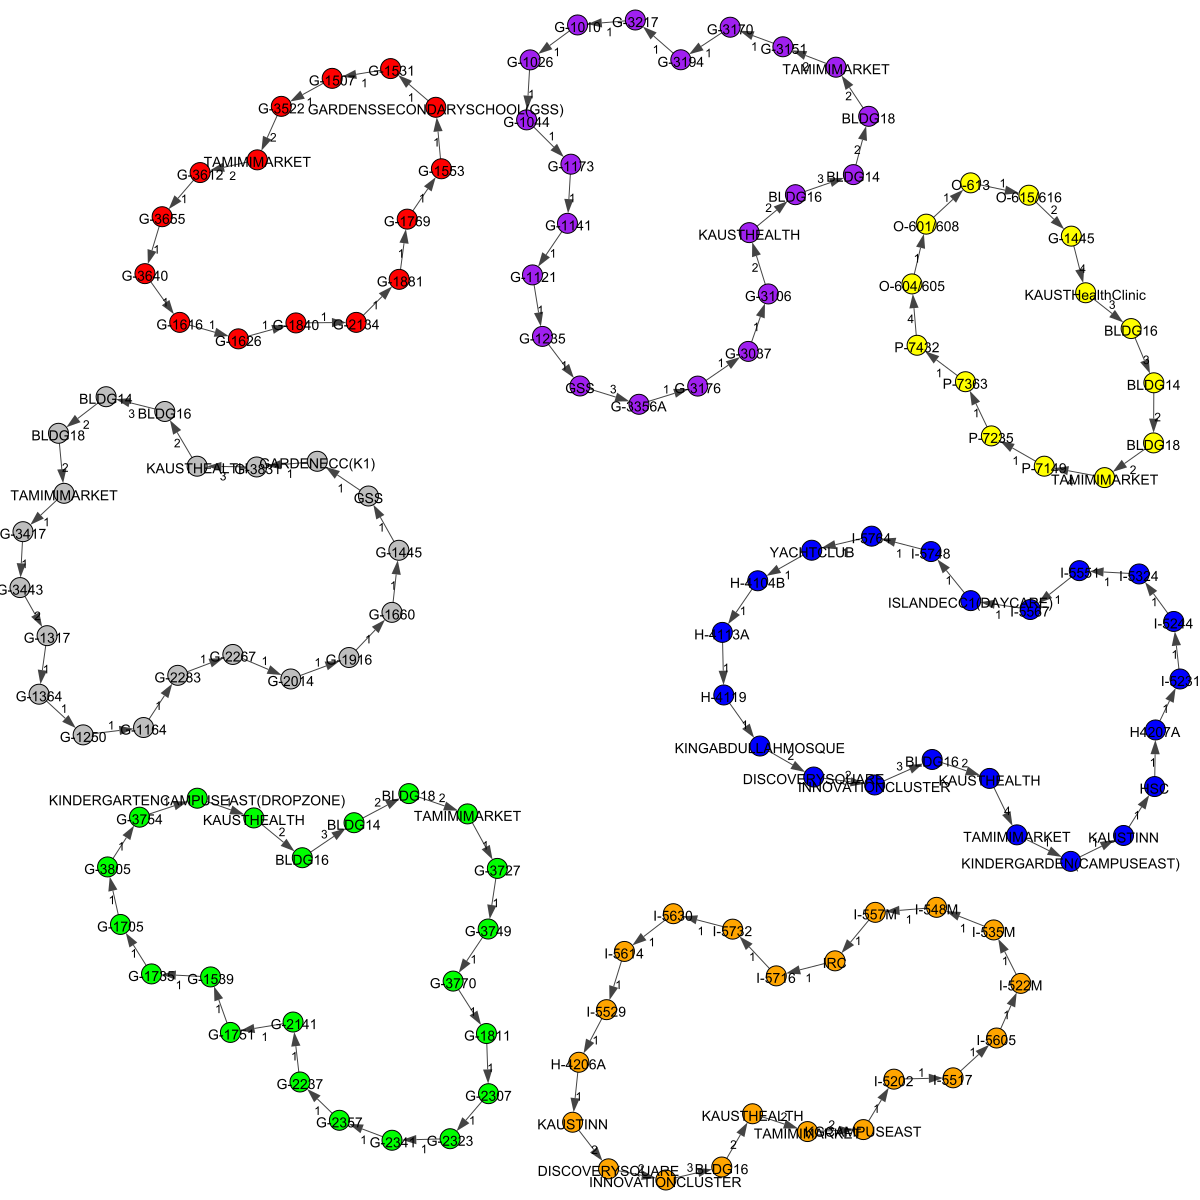

In [22]:

import igraph as ig
#If we want to change our model as a dynamic network, we can change the way the calculate the time difference
def IfGreater(time1,time2):
    if (time2.hour>time1.hour) or (time2.hour==time1.hour and time2.minute>time1.minute):
        return True
def timeDiff(timeS1:"timeschedule for line 1",timeS2:"timescuedule for line2"):
    time1=timeS1[0]
    for item in timeS2:
        if IfGreater(time1,item):
            time2=item## It should be the first one that can satisify time2>time1, for the same line we can use this as the fix
            break
    diff=0
    #print(f"time1={time1},time.h={time1.hour},time.m={time1.minute}")
    if (time2.hour>time1.hour):
        diff=(time2.hour-time1.hour)*60+time2.minute-time1.minute
    elif (time2.hour==time1.hour and time2.minute>time1.minute):
        diff=(time2.hour-time1.hour)*60+time2.minute-time1.minute
    return diff

# creat a blank graph
#build a dict to map name and verticeID during the processing of building the graph
g=ig.Graph(directed=True)
VerticeID=0# record the verticeID added into the graph
EdgeID=0
Name2ID_dict={}# Like Mapping Tamimi to 0-> {"Tamimi":0}
ID2Name_dict={}# map ID to stop names
Last_Travel={'Blue':4, 'Orange':2, 'Green':2, 'Gray':2, 'Red':2, 'Purple':2, 'Oasis':2, 'Palm':4}
Vertex_color_dict={'Blue':'blue', 'Orange':'orange', 'Green':'green', 'Gray':'gray', 'Red':'red', 'Purple':'purple', 'Oasis':'yellow', 'Palm':None}
for LINE in Line_names:
    StopList=map_dict[LINE].columns.tolist()
    for stop in StopList:
        #print("stop=",stop)
        #if stop not in Name2ID_dict:
        g.add_vertex(VerticeID)
        g.vs[VerticeID]["name"]=stop
        g.vs[VerticeID]["timeSchedule"]=map_dict[LINE][stop]
        g.vs[VerticeID]["Line"]=LINE
        ID2Name_dict[str(VerticeID)]=stop
        if stop in Name2ID_dict:
            origindata=Name2ID_dict[stop]
            origindata.append(VerticeID)
            Name2ID_dict[stop]=origindata#add one more ID to this stop
        else:
            Name2ID_dict[stop]=[VerticeID]
        VerticeID=VerticeID+1# next node ID
    istop=0
    stoplen=len(StopList)
    for stop in StopList:
        if istop==stoplen-1:#the last stop of this line
            #print(f"tuple([Name2ID_dict[StopList[istop]][-1],Name2ID_dict[StopList[0]][-1]])={tuple([Name2ID_dict[StopList[istop]][-1],Name2ID_dict[StopList[0]][-1]])}")
            g.add_edges([tuple([Name2ID_dict[StopList[istop]][-1],Name2ID_dict[StopList[0]][-1]])])
            # Here the travel time calculated base on the experiment
            # for which: blue=4mins Red:2mins Gray:2mins Osis:2mins #orange:2mins(maybe, lacking data), Palm:4mins
            g.es[EdgeID]["weight"]=Last_Travel[g.vs[Name2ID_dict[StopList[istop]][-1]]["Line"]]
            EdgeID=EdgeID+1# next edgeID
        else:
            #print(f"tuple([Name2ID_dict[StopList[istop]][-1],Name2ID_dict[StopList[istop+1]][-1]])={tuple([Name2ID_dict[StopList[istop]][-1],Name2ID_dict[StopList[istop+1]][-1]])}")
            g.add_edges([tuple([Name2ID_dict[StopList[istop]][-1],Name2ID_dict[StopList[istop+1]][-1]])])
            g.es[EdgeID]["weight"]=timeDiff(g.vs[Name2ID_dict[StopList[istop]][-1]]["timeSchedule"],g.vs[Name2ID_dict[StopList[istop+1]][-1]]["timeSchedule"])
            EdgeID=EdgeID+1
        istop=istop+1
print("weight=",g.es["weight"])
print(f"Name2ID_dict={Name2ID_dict},ID2Name_dict={ID2Name_dict}")
source=1
destination=4
result=g.get_shortest_paths(source, to=destination, weights=g.es["weight"], mode='out', output='vpath', algorithm='auto')
print(f"simple test, shortest path from node{source}to node{destination}:{result}")
layout = g.layout("kk")
ig.plot(g, layout=layout,vertex_label=[stop for stop in g.vs["name"]],bbox=[1200,1200],vertex_color=[Vertex_color_dict[v["Line"]] for v in g.vs],edge_label=g.es["weight"],edge_label_dist=10)


VertexID=135,len(g.vs)=135
SwitchStopNames=['TAMIMIMARKET', 'KAUSTINN', 'DISCOVERYSQUARE', 'INNOVATIONCLUSTER', 'BLDG16', 'KAUSTHEALTH', 'BLDG14', 'BLDG18', 'G-1445', 'GSS'],SwitchStopID=[[0, 22, 43, 65, 85, 100, 121], [2, 38], [18, 39], [19, 40], [20, 41, 62, 82, 118, 132], [21, 42, 61, 81, 117], [63, 83, 119, 133], [64, 84, 120, 134], [77, 130], [78, 112]]
iname= TAMIMIMARKET
iname= KAUSTINN
iname= DISCOVERYSQUARE
iname= INNOVATIONCLUSTER
iname= BLDG16
iname= KAUSTHEALTH
iname= BLDG14
iname= BLDG18
iname= G-1445
iname= GSS


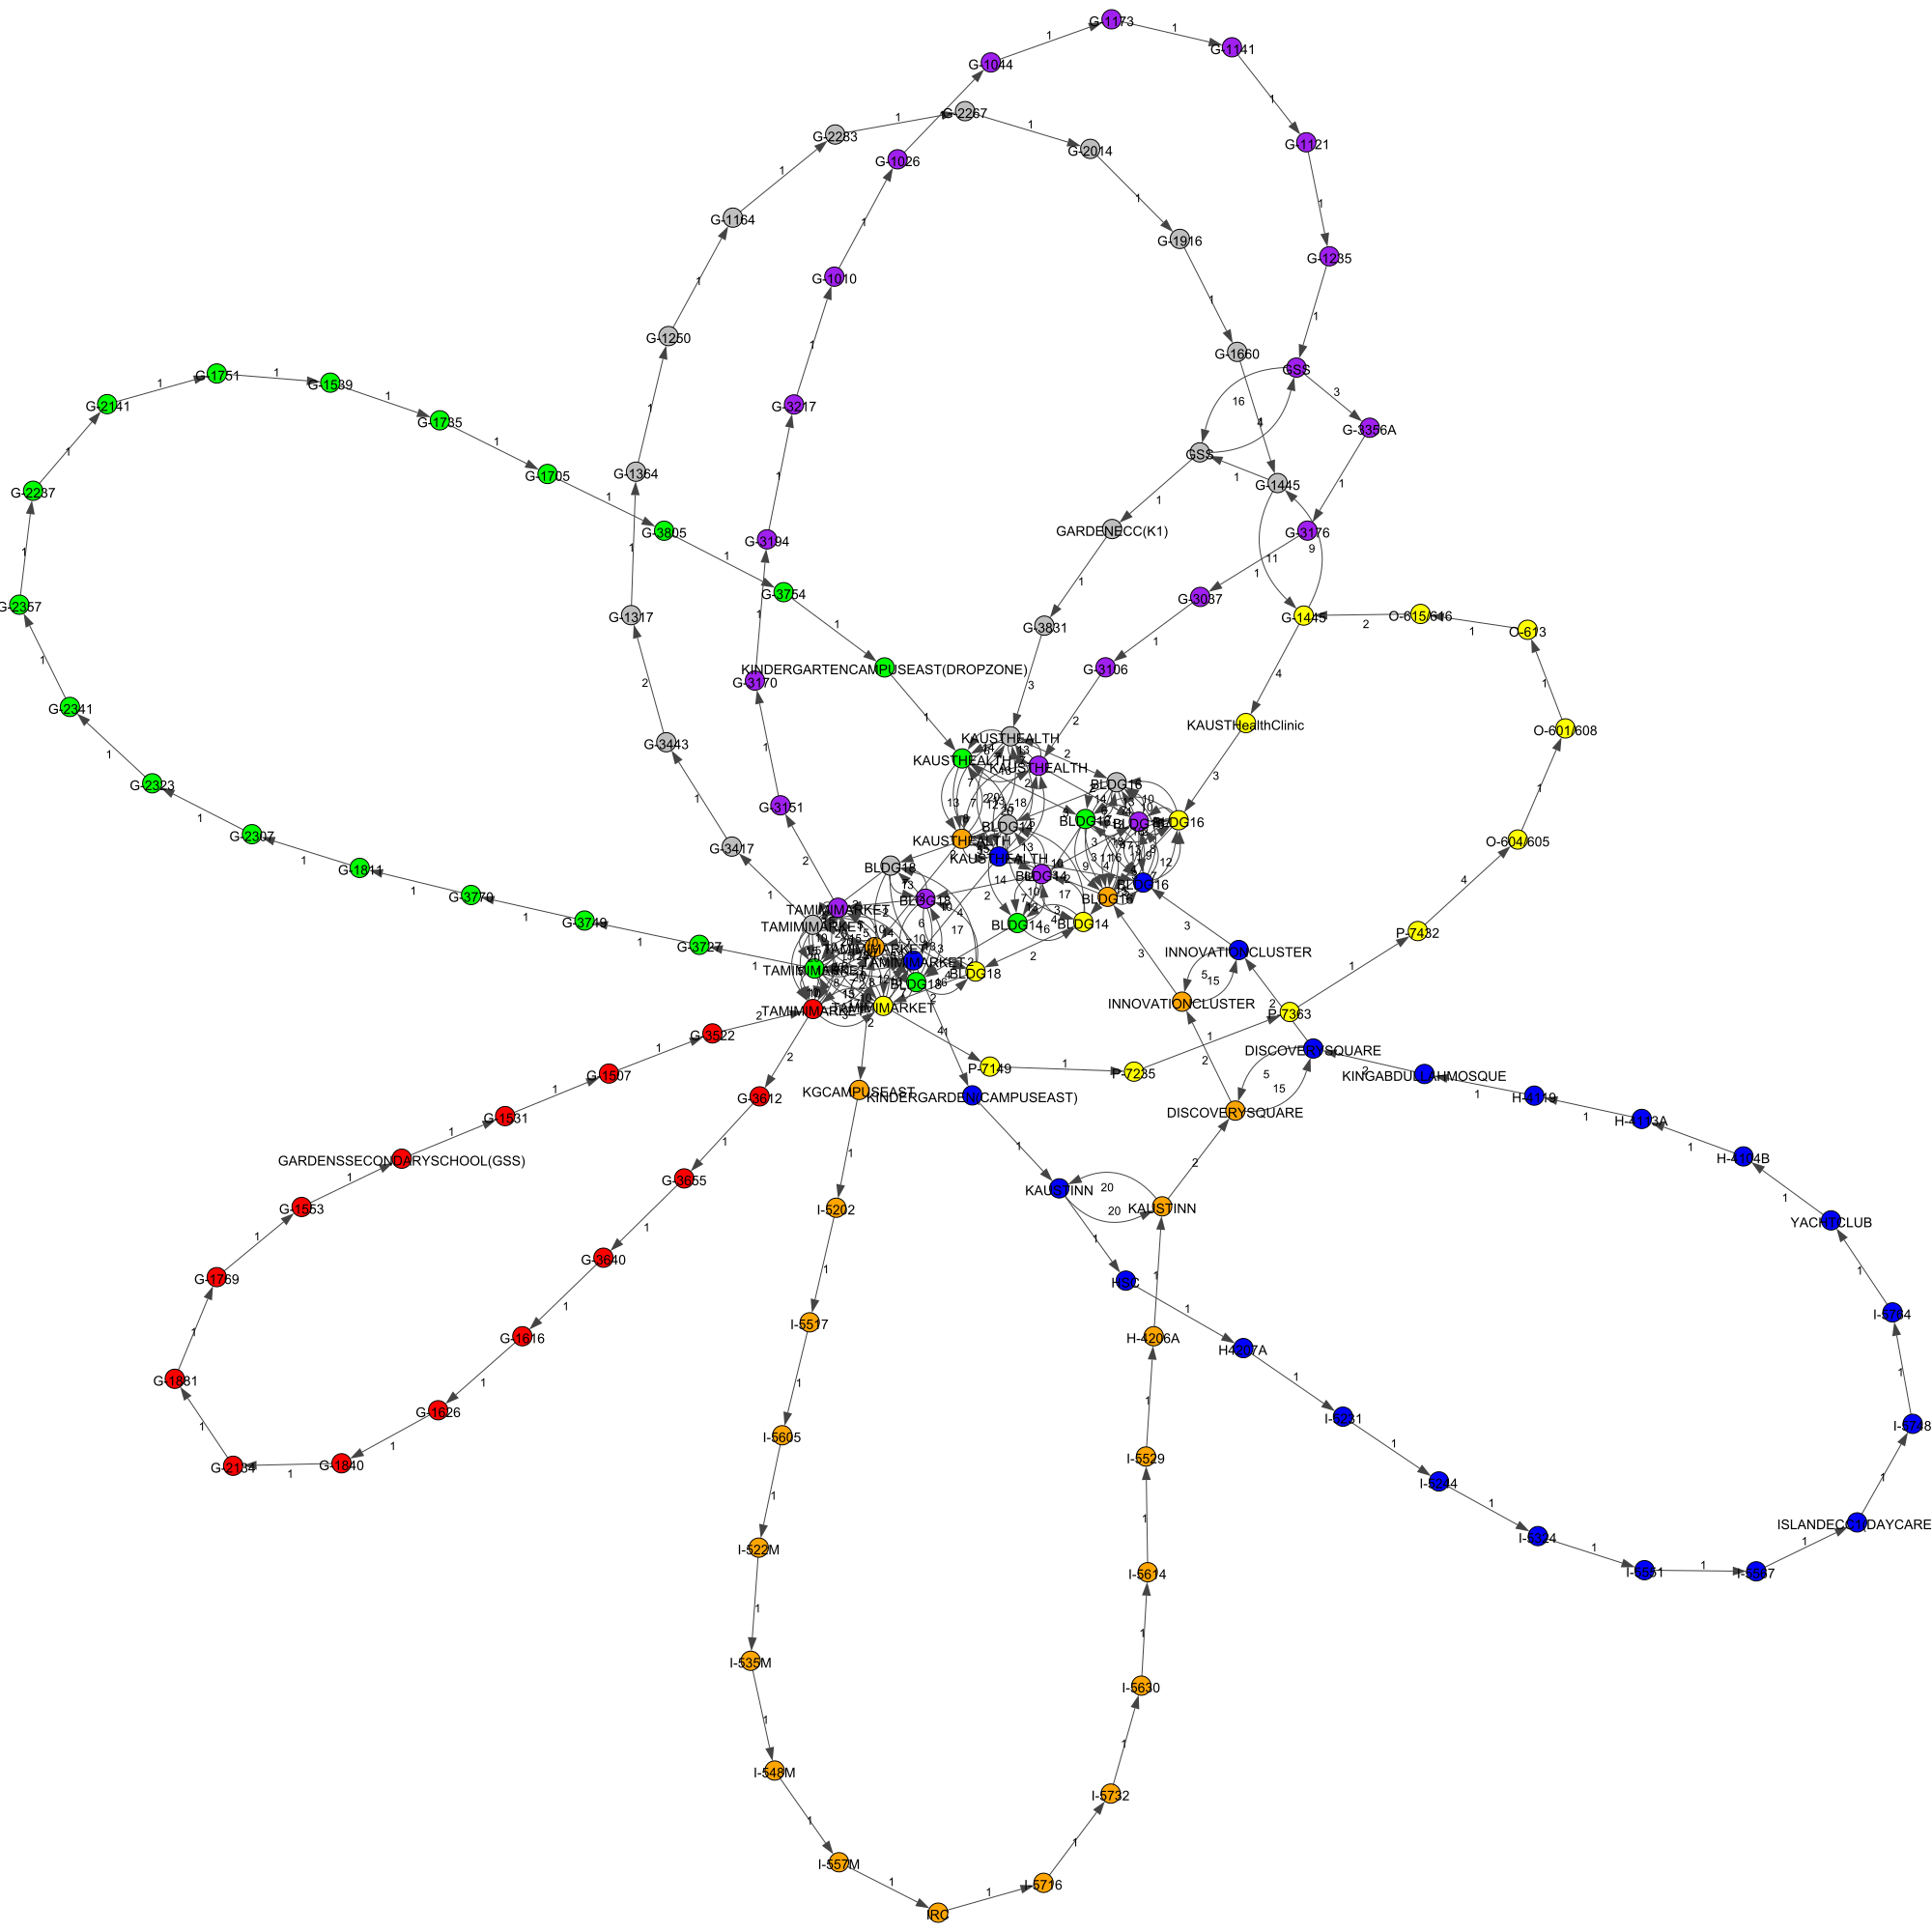

In [23]:
# Next I will concatentate these lines together. However, I will ingore the problem in the Palm line first.
#The way to concatenate these line:
    #1. search all the stop's name. Each stop has a list mapping the name to the vertexID.
    #2. Once I get the IDs for each same node, I compare the time schedule for each node to get a minimun travel time
# Like, for Tamimi, it has 'TAMIMIMARKET': [0, 22, 43, 65, 85, 100, 121] seven lines connected together. I search the time schedule for each line, and get the difference for each pair edge for switch

# We have got all the weight for each line. Now I am going to concatenate all the lines together
print(f"VertexID={VerticeID},len(g.vs)={len(g.vs)}")
SwitchStopNames=[]
SwitchStopID=[]
for iv in range(len(g.vs)):
    iname=g.vs[iv]["name"]
    switchList=Name2ID_dict[iname]# if one stop name have more than one vertexID, this stop can be a switch stop
    if(len(switchList)>1) and iname not in SwitchStopNames:
        SwitchStopNames.append(iname)
        SwitchStopID.append(switchList)
print(f"SwitchStopNames={SwitchStopNames},SwitchStopID={SwitchStopID}")#SwitchStopNames=['TAMIMIMARKET', 'KAUSTINN', 'DISCOVERYSQUARE', 'INNOVATIONCLUSTER', 'BLDG16', 'KAUSTHEALTH', 'BLDG14', 'BLDG18', 'G-1445', 'GSS']
# add edges based on the switch stop
for iname in SwitchStopNames:
     print("iname=",iname)
     switchList=Name2ID_dict[iname]
     # each pair node in the List has one edge
     for id1 in switchList:
         for id2 in switchList:
             if id1!=id2:
                    g.add_edges([tuple([id1,id2])])
                    g.es[EdgeID]["weight"]=timeDiff(g.vs[id1]["timeSchedule"],g.vs[id2]["timeSchedule"])
                    EdgeID=EdgeID+1
layout = g.layout("kk")

ig.plot(g, layout=layout,vertex_label=[stop for stop in g.vs["name"]],bbox=[2000,2000],vertex_color=[Vertex_color_dict[v["Line"]] for v in g.vs],edge_label=g.es["weight"],edge_label_dist=10,edge_arrow_size=1,edge_arrow_width=1)


Something need to be considered
At this stage,  If the time I get off a bus equal to the departure time of another bus, I consider we need to wait for  next departure time 